<a href="https://colab.research.google.com/github/Mazuda-Zaki/applied-ai-projects/blob/main/01_Ecommerce_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install textblob

In [1]:
# Step 1: Data Collection (Loading the Data)

# 1. Import the library. 'pd' is the universal nickname for pandas.
import pandas as pd

# 2. Create a standard Python dictionary with our messy, real-world data.
data = {
    "Review_ID" : [1, 2, 3, 4, 5],
    "Customer_Review": [
        "This post-acne serum is AMAZING!! My dark spots faded in a week. 😍",
        "It was okay, but a bit sticky.",
        None, # Uh oh, a missing value! A customer left a star rating but no text.
        "TERRIBLE. Broke me out more!!! 😡",
        "I've bought this serum 3 times. Holy grail product."
    ]
}
# 3. Convert the dictionary into a Pandas DataFrame (a 2D table)

df = pd.DataFrame(data)

print("--- ORIGINAL, MESSY DATA ---")
print(df)

--- ORIGINAL, MESSY DATA ---
   Review_ID                                    Customer_Review
0          1  This post-acne serum is AMAZING!! My dark spot...
1          2                     It was okay, but a bit sticky.
2          3                                               None
3          4                   TERRIBLE. Broke me out more!!! 😡
4          5  I've bought this serum 3 times. Holy grail pro...


In [4]:
# Step 2: Data Cleaning (Preprocessing)

# --- CLEANING STEP 1: Handle Missing Data ---
# We use the .dropna() method to delete any row where the 'Customer_Review' is missing.
df_clean = df.dropna(subset =['Customer_Review']).copy()

# --- CLEANING STEP 2: Convert to Lowercase ---
# We access the string (.str) properties of the column and force everything to lowercase.
df_clean['Customer_Review'] = df_clean['Customer_Review'].str.lower()


# --- CLEANING STEP 3: Remove Punctuation and Emojis ---
# We use a simple Regular Expression (regex).
# '[^a-z0-9\s]' tells Python: "If a character is NOT (^) a lowercase letter (a-z),
# a number (0-9), or a space (\s), replace it with nothing ('')."
df_clean['Customer_Review'] = df_clean['Customer_Review'].str.replace(r'[^a-z0-9\s]', '', regex=True)

print("\n--- CLEANED, AI-READY DATA ---")
print(df_clean)


--- CLEANED, AI-READY DATA ---
   Review_ID                                    Customer_Review
0          1  this postacne serum is amazing my dark spots f...
1          2                       it was okay but a bit sticky
3          4                        terrible broke me out more 
4          5   ive bought this serum 3 times holy grail product


In [6]:
# Step 3: The AI Model (Sentiment Analysis)
# 1. Import the AI library (You might need to run '!pip install textblob' first in Colab)
from textblob import TextBlob

# 2. Create a custom Python function (Great practice for your PCEP!)
def analyze_emotion(review_text):
  # TextBlob reads the text and calculates the math score (-1.0 to 1.0)
  score = TextBlob(review_text).sentiment.polarity

  # We use basic if/else logic to turn the math score into a simple word
  if score > 0:
    return "Positive"
  elif score < 0:
    return "Negative"
  else:
    return "Neutral"

# 3. Apply this AI function to every single row in our dataset
df_clean['AI_Sentiment'] = df_clean['Customer_Review'].apply(analyze_emotion)

print("\n--- FINAL RESULTS WITH AI SENTIMENT ---")
print(df_clean[['Customer_Review', 'AI_Sentiment']])



--- FINAL RESULTS WITH AI SENTIMENT ---
                                     Customer_Review AI_Sentiment
0  this postacne serum is amazing my dark spots f...     Positive
1                       it was okay but a bit sticky     Positive
3                        terrible broke me out more      Negative
4   ive bought this serum 3 times holy grail product      Neutral


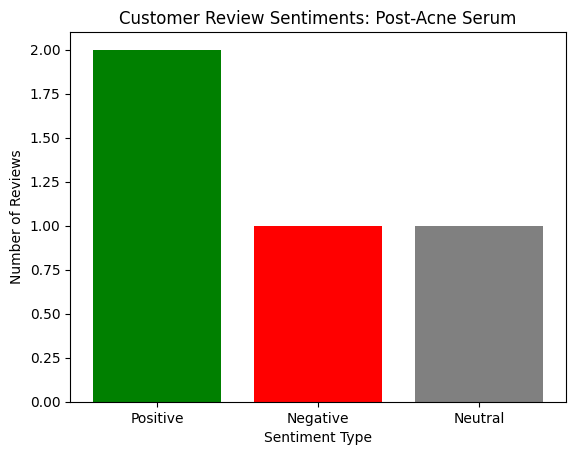

In [7]:
# Step 4: The Interface (Data Visualization)

# 1. Import the visualization library (the standard nickname is 'plt')
import matplotlib.pyplot as plt

# 2. Count how many times each sentiment appears
# .value_counts() is a crucial Pandas method that tallies up unique values
counts = df_clean['AI_Sentiment'].value_counts()

# 3. Build the bar chart
# We put the sentiment names on the x-axis, and the tallies on the y-axis
plt.bar(counts.index, counts.values, color =['green', 'red', 'gray'])

# 4. Add professional labels so users know what they are looking at
plt.title('Customer Review Sentiments: Post-Acne Serum')
plt.xlabel('Sentiment Type')
plt.ylabel('Number of Reviews')

# 5. Display the final chart
plt.show()